In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
a, b, c, d = 0.3, 0.3, 0.07, 0.3

In [60]:
num_time_steps = 110
input_size = 1
hidden_size = 12
output_size = 1
lr = 0.001
epochs = 50 
start = 0
time_steps = np.linspace(start, start + 200, num_time_steps)
data = a * np.cos(b * time_steps) + c * np.sin(d * time_steps)

In [61]:
class RNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_size = hidden_size
        self.W_xh = np.random.randn(hidden_size, input_size) * 0.01
        self.W_hh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.W_hy = np.random.randn(output_size, hidden_size) * 0.01
        self.b_h = np.random.randn(hidden_size, 1) * 0.01
        self.b_y = np.random.randn(output_size, 1) * 0.01

    def forward(self, x, h_prev):
        h_next = np.tanh(np.dot(self.W_xh, x) + np.dot(self.W_hh, h_prev) + self.b_h)
        y = np.dot(self.W_hy, h_next) + self.b_y
        return y, h_next

In [62]:
rnn = RNN(input_size, hidden_size, output_size)

In [63]:
h_prev = np.zeros((hidden_size, 1))

errors = []
for epoch in range(epochs):
    for iter in range(200):
        x = data[:-1].reshape(num_time_steps - 1, 1)
        y = data[1:].reshape(num_time_steps - 1, 1)

        dW_xh, dW_hh, dW_hy = np.zeros_like(rnn.W_xh), np.zeros_like(rnn.W_hh), np.zeros_like(rnn.W_hy)
        db_h, db_y = np.zeros_like(rnn.b_h), np.zeros_like(rnn.b_y)
        dh_next = np.zeros_like(h_prev)
        total_error = 0

        for i in range(num_time_steps - 2, -1, -1):
            x_t = x[i].reshape(1, 1)
            y_t = y[i].reshape(1, 1)
            pred, h_prev = rnn.forward(x_t, h_prev)

            dy = pred - y_t
            total_error += np.sum(dy ** 2)
            dW_hy += np.dot(dy, h_prev.T)
            db_y += dy
            dh = np.dot(rnn.W_hy.T, dy) + dh_next
            dh_raw = (1 - h_prev * h_prev) * dh
            db_h += dh_raw
            dW_xh += np.dot(dh_raw, x_t.T)
            dW_hh += np.dot(dh_raw, h_prev.T)
            dh_next = np.dot(rnn.W_hh.T, dh_raw)


        for dparam in [dW_xh, dW_hh, dW_hy, db_h, db_y]:
            np.clip(dparam, -7, 7, out=dparam)

        rnn.W_xh -= lr * dW_xh
        rnn.W_hh -= lr * dW_hh
        rnn.W_hy -= lr * dW_hy
        rnn.b_h -= lr * db_h
        rnn.b_y -= lr * db_y
        
    errors.append(total_error)
    print(f"Epoch {epoch} \tError: {total_error:.5f}")

Epoch 0 	Error: 5.17795
Epoch 1 	Error: 5.08382
Epoch 2 	Error: 4.57153
Epoch 3 	Error: 2.53252
Epoch 4 	Error: 0.66637
Epoch 5 	Error: 0.48998
Epoch 6 	Error: 0.43700
Epoch 7 	Error: 0.36091
Epoch 8 	Error: 0.26448
Epoch 9 	Error: 0.18000
Epoch 10 	Error: 0.14907
Epoch 11 	Error: 0.14649
Epoch 12 	Error: 0.14661
Epoch 13 	Error: 0.14662
Epoch 14 	Error: 0.14653
Epoch 15 	Error: 0.14645
Epoch 16 	Error: 0.14638
Epoch 17 	Error: 0.14631
Epoch 18 	Error: 0.14623
Epoch 19 	Error: 0.14616
Epoch 20 	Error: 0.14608
Epoch 21 	Error: 0.14600
Epoch 22 	Error: 0.14593
Epoch 23 	Error: 0.14585
Epoch 24 	Error: 0.14577
Epoch 25 	Error: 0.14568
Epoch 26 	Error: 0.14560
Epoch 27 	Error: 0.14551
Epoch 28 	Error: 0.14542
Epoch 29 	Error: 0.14533
Epoch 30 	Error: 0.14524
Epoch 31 	Error: 0.14514
Epoch 32 	Error: 0.14504
Epoch 33 	Error: 0.14493
Epoch 34 	Error: 0.14483
Epoch 35 	Error: 0.14471
Epoch 36 	Error: 0.14460
Epoch 37 	Error: 0.14448
Epoch 38 	Error: 0.14435
Epoch 39 	Error: 0.14422
Epoch 40 	

In [66]:
x = data[:-1].reshape(num_time_steps - 1, 1)

preds = []
h_prev = np.zeros((hidden_size, 1))
for i in range(num_time_steps - 1):
    x_t = x[i].reshape(1, 1)
    pred, h_prev = rnn.forward(x_t, h_prev)
    preds.append(pred.ravel()[0])

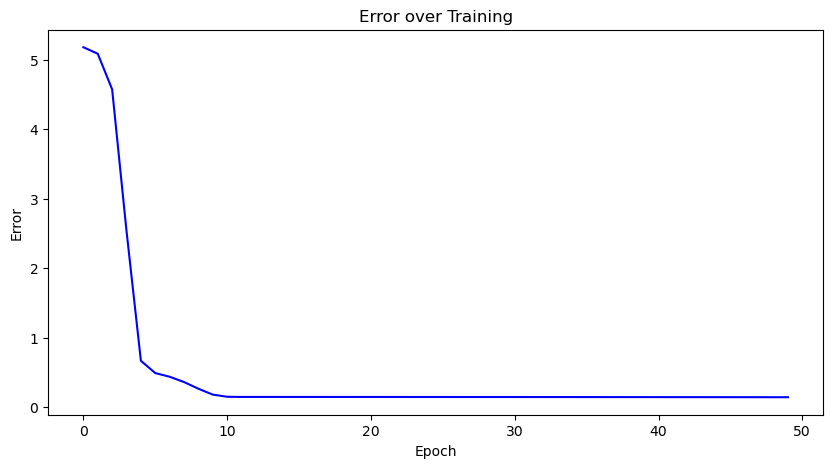

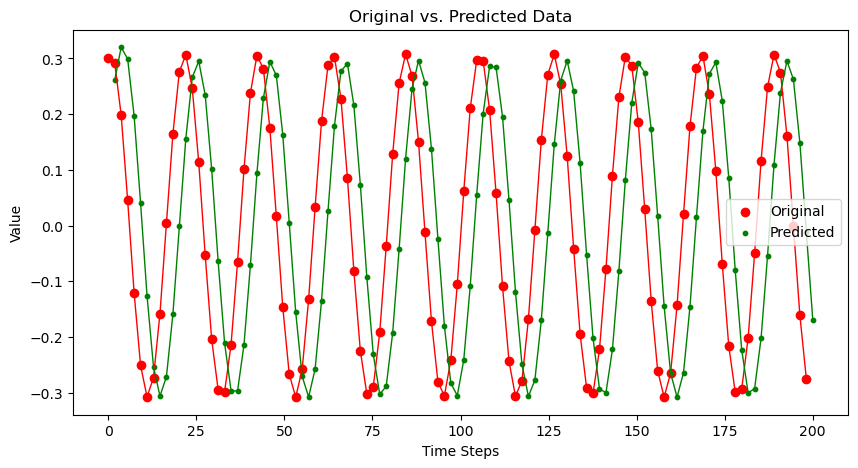

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(errors)), errors, color='blue')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error over Training')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(time_steps[:-1], x.ravel(), label='Original', color='red')
plt.plot(time_steps[:-1], x.ravel(), linewidth=1, color='red')

plt.scatter(time_steps[1:], preds, s=10, label='Predicted', color='green')
plt.plot(time_steps[1:], preds, linewidth=1, color='green')

plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Original vs. Predicted Data')
plt.legend()
plt.show()